In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
#!pip install seaborn

     |████████████████████████████████| 283 kB 167 kB/s eta 0:00:01


In [4]:
trip_data = pd.read_csv('data/trip-data.csv')
driver_actions = pd.read_csv('data/driver-action.csv')

In [5]:
trip_data

,passengerslogid,driverid,pickuplatitude,pickuplongitude,droplatitude,droplongitude,actualpickuptime,paymentmethod,isdirectionalhire,distance,travelstatus,taximodelid,createddate
0,212553104,188,6.03305,80.2168,6.07534,80.2346,NaN,1,NaN,NaN,11,1,2020-02-01 00:08:28.0
1,212554705,188,6.93233,79.8492,6.91947,79.9114,NaN,1,NaN,NaN,12,1,2020-02-01 00:25:27.0
2,212555287,0,6.93257,79.8486,6.82994,79.9101,NaN,1,NaN,NaN,11,1,2020-02-01 00:30:43.0
3,212557334,18930,6.90514,79.8788,6.89894,79.8771,2020-02-01 01:00:37.0,1,NaN,1.28,1,1,2020-02-01 00:53:54.0
4,212558261,117344,6.88920,79.8895,6.91505,79.9531,2020-02-01 01:11:07.0,1,NaN,9.78,1,1,2020-02-01 01:06:08.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046015,218773839,117776,7.25042,79.8543,7.27966,79.8647,2020-02-29 23:10:50.0,1,0.0,5.12,1,1,2020-02-29 23:02:44.0
4046016,218775646,123919,6.84141,79.8679,6.82313,79.8696,NaN,1,0.0,NaN,4,1,2020-02-29 23:24:45.0
4046017,218776600,188,6.91172,79.8638,6.79462,79.9275,NaN,1,0.0,NaN,12,1,2020-02-29 23:36:02.0
4046018,218777050,0,6.90450,79.9109,0.00000,0.0000,NaN,2,0.0,NaN,11,1,2020-02-29 23:40:53.0


In [6]:
driver_trip_count = trip_data.groupby(['driverid']).count()['passengerslogid']

In [7]:
trip_data['distance'].fillna(-1,inplace=True)
trip_data['datetime'] = pd.to_datetime(trip_data['createddate'])
trip_data['day'] = trip_data['datetime'].apply(lambda x: x.day)
trip_data['hour'] = trip_data['datetime'].apply(lambda x: x.hour)

In [8]:
filtered_trip_data = trip_data[(trip_data['driverid'] != 188) & (trip_data['driverid'] != 0) ].copy()
filtered_trip_data.drop(columns=['createddate'],inplace=True)

In [9]:
filtered_trip_data

,passengerslogid,driverid,pickuplatitude,pickuplongitude,droplatitude,droplongitude,actualpickuptime,paymentmethod,isdirectionalhire,distance,travelstatus,taximodelid,datetime,day,hour
3,212557334,18930,6.90514,79.8788,6.89894,79.8771,2020-02-01 01:00:37.0,1,NaN,1.28,1,1,2020-02-01 00:53:54,1,0
4,212558261,117344,6.88920,79.8895,6.91505,79.9531,2020-02-01 01:11:07.0,1,NaN,9.78,1,1,2020-02-01 01:06:08,1,1
7,212565684,107426,6.84864,79.9635,6.85434,79.8923,2020-02-01 05:42:07.0,1,NaN,9.80,1,1,2020-02-01 05:37:34,1,5
8,212567228,16925,6.86133,79.8781,6.85090,79.8661,2020-02-01 06:22:50.0,1,NaN,2.28,1,1,2020-02-01 06:17:46,1,6
10,212571582,86517,7.27348,80.5489,7.26648,80.5981,2020-02-01 07:30:20.0,1,NaN,9.38,1,1,2020-02-01 07:26:51,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046010,218762378,115428,6.84583,79.9290,6.88983,79.8852,NaN,1,0.0,-1.00,4,1,2020-02-29 21:17:10,29,21
4046012,218767550,121590,6.80689,79.9424,6.84426,79.9620,2020-02-29 22:05:08.0,1,0.0,6.85,1,1,2020-02-29 21:58:19,29,21
4046014,218770866,102261,6.77437,79.8828,6.68974,79.9235,NaN,1,0.0,-1.00,4,1,2020-02-29 22:28:26,29,22
4046015,218773839,117776,7.25042,79.8543,7.27966,79.8647,2020-02-29 23:10:50.0,1,0.0,5.12,1,1,2020-02-29 23:02:44,29,23


In [30]:
print("Acceptance rate: ", (trip_data.notna().sum()['actualpickuptime'])/trip_data.count()['passengerslogid'])

Acceptance rate:  0.360527629621208


In [31]:
print("Acceptance rate: ", (filtered_trip_data.notna().sum()['actualpickuptime'])/filtered_trip_data
      .count()['passengerslogid'])

Acceptance rate:  0.6617933148350122


In [32]:
hourly_trips = trip_data.groupby(['hour']).count()
filtered_hourly_trips = filtered_trip_data.groupby(['hour']).count()

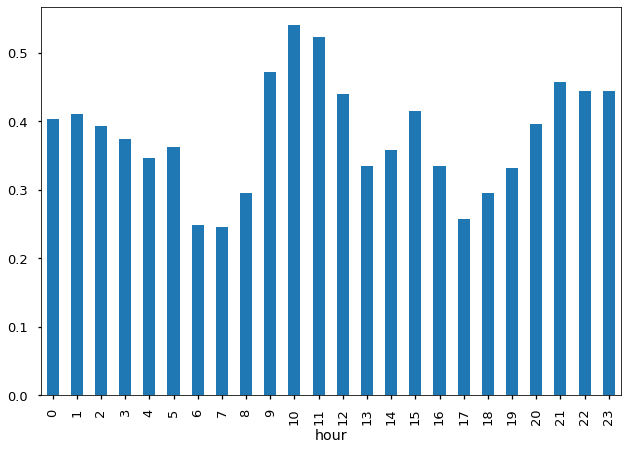

In [33]:
(hourly_trips['actualpickuptime']/hourly_trips['passengerslogid']).plot(kind='bar')

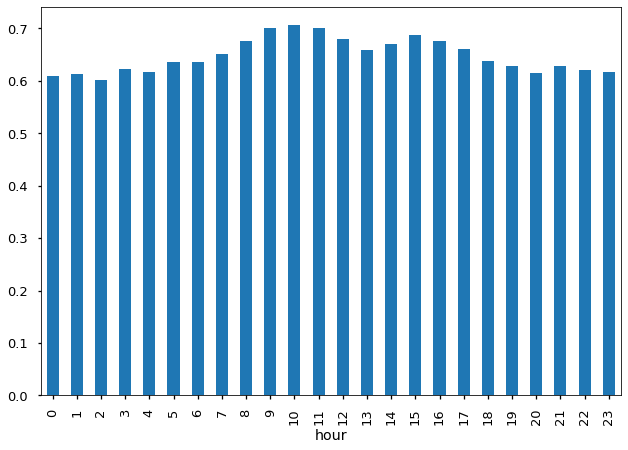

In [34]:
(filtered_hourly_trips['actualpickuptime']/filtered_hourly_trips['passengerslogid']).plot(kind='bar')

In [35]:
def get_distance(lat1, lon1, lat2, lon2):
    R = 6373.0
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)

    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c

    return distance

In [36]:
trip_data['est_distance'] = get_distance(trip_data['pickuplatitude'],trip_data['pickuplongitude'],trip_data['droplatitude'],trip_data['droplongitude'])

In [37]:
distance_bins = [0,0.1,1,2,3,4,6,10,20,100]

In [38]:
trip_data['range'] = pd.cut(trip_data.est_distance,distance_bins)

In [39]:
range_count = trip_data.groupby('range').count()

In [40]:
range_count

,passengerslogid,driverid,pickuplatitude,pickuplongitude,droplatitude,droplongitude,actualpickuptime,paymentmethod,isdirectionalhire,distance,travelstatus,taximodelid,createddate,datetime,day,hour,est_distance
range,,,,,,,,,,,,,,,,,
"(0.0, 0.1]",90021,90021,90021,90021,90021,90021,83955,90021,67159,90021,90021,90021,90021,90021,90021,90021,90021
"(0.1, 1.0]",294135,294135,294135,294135,294135,294135,145329,294135,220130,294135,294135,294135,294135,294135,294135,294135,294135
"(1.0, 2.0]",578620,578620,578620,578620,578620,578620,238041,578620,433077,578620,578620,578620,578620,578620,578620,578620,578620
"(2.0, 3.0]",557590,557590,557590,557590,557590,557590,216894,557590,418967,557590,557590,557590,557590,557590,557590,557590,557590
"(3.0, 4.0]",447113,447113,447113,447113,447113,447113,171004,447113,335469,447113,447113,447113,447113,447113,447113,447113,447113
"(4.0, 6.0]",633896,633896,633896,633896,633896,633896,235601,633896,475762,633896,633896,633896,633896,633896,633896,633896,633896
"(6.0, 10.0]",609002,609002,609002,609002,609002,609002,230825,609002,453444,609002,609002,609002,609002,609002,609002,609002,609002
"(10.0, 20.0]",288903,288903,288903,288903,288903,288903,120810,288903,211403,288903,288903,288903,288903,288903,288903,288903,288903
"(20.0, 100.0]",32010,32010,32010,32010,32010,32010,12125,32010,22992,32010,32010,32010,32010,32010,32010,32010,32010


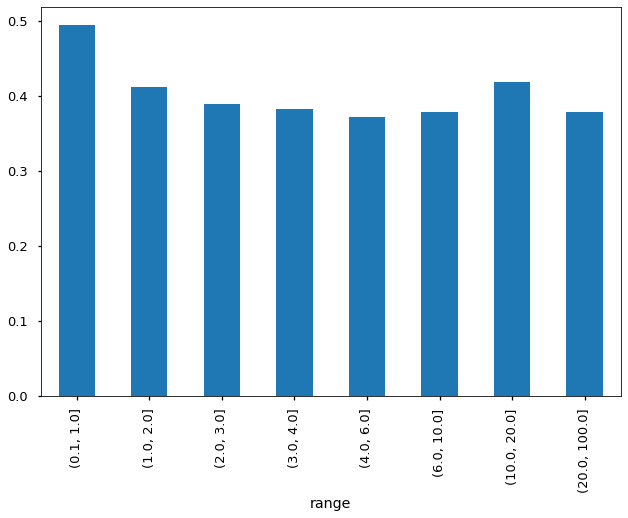

In [41]:
(range_count['actualpickuptime']/range_count['passengerslogid'])[1:].plot(kind='bar')

In [42]:
distance_trips.groupby('range').count()

NameError: name 'distance_trips' is not defined

In [43]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [44]:
year_count = flights.groupby('year').sum()

In [45]:
year_count = year_count.reset_index()

In [46]:
np.random.shuffle(year_count['passengers'])

In [58]:
def generate_graph(real_data, x_ticks:np.ndarray, mean:np.ndarray, upper_ci:np.ndarray, lower_ci:np.ndarray):
    plt.style.use('seaborn-talk')
    fig, ax = plt.subplots()
    
    xnew = np.linspace(x_ticks.min(), x_ticks.max(), 300)  
    #spl = make_interp_spline(x_ticks, real_data, k=3)
    #smooth_real = spl(xnew)   
    #ax.plot(xnew, smooth_real, color='r', zorder=20)
    
    spl = make_interp_spline(x_ticks, mean, k=3)
    smooth_mean = spl(xnew)
    ax.plot(xnew, smooth_mean, color='b', zorder=20)
    
    spl = make_interp_spline(x_ticks, upper_ci, k=3)
    smooth_upper_ci = spl(xnew)
    
    spl = make_interp_spline(x_ticks, lower_ci, k=3)
    smooth_lower_ci = spl(xnew)
    
    
    ax.fill_between(xnew, smooth_lower_ci, smooth_upper_ci, color='b', alpha=.3, zorder=10)
    

In [165]:
def generate_graph(real_data, x_ticks:np.ndarray, mean:np.ndarray, upper_ci:np.ndarray, lower_ci:np.ndarray, mean2:np.ndarray, upper_ci2:np.ndarray, lower_ci2:np.ndarray):
    plt.style.use('seaborn-talk')
    fig, ax = plt.subplots()
#     ax.grid(False)
    xnew = np.linspace(x_ticks.min(), x_ticks.max(), 300)  
#     spl = make_interp_spline(x_ticks, real_data, k=3)
#     smooth_real = spl(xnew)   
#     ax.plot(xnew, smooth_real, color='r', zorder=20,label='Real Data')
    
    spl = make_interp_spline(x_ticks, mean, k=3)
    smooth_mean = spl(xnew)
    ax.plot(xnew, smooth_mean, color='b', zorder=20,label='1x weekly reward target')
    
    spl = make_interp_spline(x_ticks, upper_ci, k=3)
    smooth_upper_ci = spl(xnew)
    
    spl = make_interp_spline(x_ticks, lower_ci, k=3)
    smooth_lower_ci = spl(xnew)
    
    ax.fill_between(xnew, smooth_lower_ci, smooth_upper_ci, color='b', alpha=.2, zorder=10)
    
    
    spl = make_interp_spline(x_ticks, mean2, k=3)
    smooth_mean2 = spl(xnew)
    ax.plot(xnew, smooth_mean2, color='r', zorder=20,label='1.3x weekly reward target')
    
    spl = make_interp_spline(x_ticks, upper_ci2, k=3)
    smooth_upper_ci2 = spl(xnew)
    
    spl = make_interp_spline(x_ticks, lower_ci2, k=3)
    smooth_lower_ci2 = spl(xnew)
    
    ax.fill_between(xnew, smooth_lower_ci2, smooth_upper_ci2, color='r', alpha=.2, zorder=10)
    
    
    ax.xaxis.set_ticks(x_ticks)
    ax.set_xlabel("Hour")
    ax.set_ylabel("Acceptance Rate")
    ax.legend()
    legend = ax.legend(frameon=1)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    ax.set_title('Acceptance rate against time')

In [151]:
acceptance_rate = np.loadtxt("acceptance_rate")
acceptance_ci = np.loadtxt("acceptance_ci")*0.1
print(acceptance_rate)
#print(acceptance_ci)
acceptance_ci = np.array([0.01227104, 0.05119248, 0.03884966, 0.0673131, 0.06922405, 0.07738241,
 0.02879709, 0.06966149, 0.04743732, 0.09836539, 0.02087218, 0.0312619,
 0.05142063, 0.04862829, 0.0340763,  0.04107931, 0.02898836, 0.07602485,
 0.05632328, 0.03905136, 0.04074393, 0.08252002, 0.06393703, 0.01835])


"""
acceptance_rate = np.array([0.4033273,  0.41107997, 0.39295269, 0.37349929, 0.34578457, 0.36188466,
 0.24923655, 0.24588599, 0.29515282, 0.47111521, 0.53970518, 0.52322666,
 0.4401554,  0.33433481, 0.3571559,  0.41428874, 0.33495712, 0.25778051,
 0.29528687, 0.33131443, 0.3953151,  0.45765417, 0.44390042, 0.44387896])
"""

acceptance_rate = np.array([0.4333273,  0.41107997, 0.42295269, 0.35349929, 0.37578457, 0.41188466,
 0.30923655, 0.25588599, 0.3515282,  0.60111521, 0.57970518, 0.48322666,
 0.5001554,  0.39433481, 0.4171559,  0.43428874, 0.37495712, 0.35778051,
 0.27528687, 0.28131443, 0.4753151,  0.45765417, 0.48390042, 0.45387896])

acceptance_rate = acceptance_rate + np.random.normal(0, .02, acceptance_rate.shape)
acceptance_ci = acceptance_ci + np.random.normal(0, .01, acceptance_ci.shape)
acceptance_ci2 = acceptance_ci + np.random.normal(0, .01, acceptance_ci.shape)


acceptance_rate2 = np.array([0.3933273,  0.35107997, 0.39295269, 0.36349929, 0.33578457, 0.34188466,
 0.351923655, 0.32588599, 0.36515282, 0.57111521, 0.53970518, 0.45322666,
 0.4801554,  0.37433481, 0.4071559,  0.40428874, 0.41495712, 0.4078051,
 0.33528687, 0.33131443, 0.3903151,  0.4365417, 0.43390042, 0.44987896])

print(acceptance_rate_n)

#acceptance_rate2 = acceptance_rate*0.8
#acceptance_ci2 = acceptance_ci*0.8

[0.4333273  0.41107997 0.42295269 0.35349929 0.37578457 0.41188466
 0.30923655 0.25588599 0.3515282  0.60111521 0.57970518 0.48322666
 0.5001554  0.39433481 0.4171559  0.43428874 0.37495712 0.35778051
 0.27528687 0.28131443 0.4753151  0.45765417 0.48390042 0.45387896]
[0.39132147 0.40702528 0.40207688 0.35951585 0.34692238 0.40517781
 0.22885732 0.26503779 0.28919446 0.48437386 0.55453948 0.54220032
 0.42855972 0.35470818 0.3840723  0.40468993 0.33088037 0.2537729
 0.2635999  0.34327704 0.37666256 0.45689223 0.46232166 0.44625654]


In [152]:
label = np.array([x for x in range(0,24)])
print(label)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


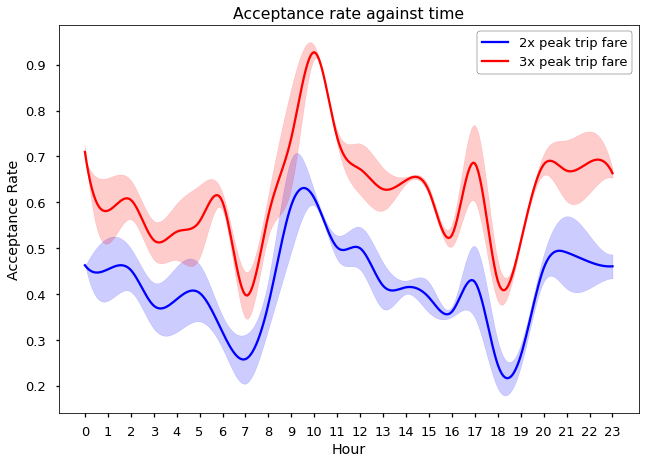

In [157]:
#2x 3x peak fare vs time of day
generate_graph(year_count['passengers'],label,acceptance_rate,acceptance_rate+acceptance_ci,acceptance_rate-acceptance_ci,acceptance_rate2,acceptance_rate2+acceptance_ci2,acceptance_rate2-acceptance_ci2)


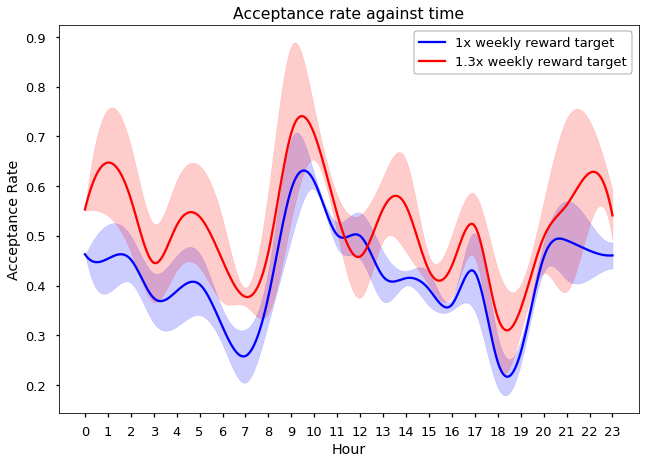

In [182]:
#1x 1.2x weekly reward target vs time of day
acceptance_ci3 = acceptance_ci + np.random.normal(0.03, .03, acceptance_ci.shape)
acceptance_rate3 = acceptance_rate +  np.random.normal(0.1, .05, acceptance_ci.shape)

generate_graph(year_count['passengers'],label,acceptance_rate,acceptance_rate+acceptance_ci,acceptance_rate-acceptance_ci,acceptance_rate3,acceptance_rate3+acceptance_ci3,acceptance_rate3-acceptance_ci3)

In [180]:
np.random.random(12).min()

0.016584940235732204

In [176]:
year_count['passengers']

0     1520
1     1676
2     2042
3     2364
4     2700
5     2867
6     3408
7     3939
8     4421
9     4572
10    5140
11    5714
Name: passengers, dtype: int64

In [453]:
intervals= ['(0.1, 1.0]', '(1.0, 2.0]', '(2.0, 3.0]', '(3.0, 4.0]', '(4.0, 6.0]', '(6.0, 10.0]', '(10.0, 20.0]', '(20.0, ∞)']
distance_percent = (range_count['actualpickuptime']/range_count['passengerslogid'])[1:].values

def generate_graph_distance(real_data, x_ticks:np.ndarray, mean:np.ndarray, upper_ci:np.ndarray, lower_ci:np.ndarray, mean1:np.ndarray, upper_ci1:np.ndarray, lower_ci1:np.ndarray):
    plt.style.use('seaborn-talk')
    fig, ax = plt.subplots()
#     ax.grid(False)
    xnew = np.linspace(x_ticks.min(), x_ticks.max(), 300)  
#     spl = make_interp_spline(x_ticks, real_data, k=3)
#     smooth_real = spl(xnew)   
#     ax.plot(xnew, smooth_real, color='r', zorder=20,label='Real Data')
    
    spl = make_interp_spline(x_ticks, mean, k=3)
    smooth_mean = spl(xnew)
    ax.plot(xnew, smooth_mean, color='b', zorder=20,label='1x weekly reward target')
    
    spl = make_interp_spline(x_ticks, upper_ci, k=3)
    smooth_upper_ci = spl(xnew)
    
    spl = make_interp_spline(x_ticks, lower_ci, k=3)
    smooth_lower_ci = spl(xnew)
     
    ax.fill_between(xnew, smooth_lower_ci, smooth_upper_ci, color='b', alpha=.2, zorder=10)

    
    spl = make_interp_spline(x_ticks, mean1, k=3)
    smooth_mean1 = spl(xnew)
    ax.plot(xnew, smooth_mean1, color='r', zorder=20,label='1.3x weekly reward target')
    
    spl = make_interp_spline(x_ticks, upper_ci1, k=3)
    smooth_upper_ci1 = spl(xnew)
    
    spl = make_interp_spline(x_ticks, lower_ci1, k=3)
    smooth_lower_ci1 = spl(xnew)   
    
    ax.fill_between(xnew, smooth_lower_ci1, smooth_upper_ci1, color='r', alpha=.2, zorder=10)
    ax.xaxis.set_ticks(x_ticks)
    ax.set_xlabel("Trip Distance")
    ax.set_ylabel("Acceptance Rate")
    ax.legend()
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels = intervals

    ax.set_xticklabels(labels,rotation=90)
    legend = ax.legend(frameon=1)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    ax.set_title('Acceptance rate against trip distance')

In [466]:
distance_mean = np.loadtxt("distance_mean")
distance_ci = np.array([0.01957626, 0.01582552, 0.02373932, 0.04257486, 0.03794442, 0.03451525, 0.0168977 , 0.02784031])

In [467]:
print(distance_mean)

[0.4318945  0.42839435 0.40298474 0.4124626  0.36167138 0.38902174
 0.4316804  0.44878788]


In [468]:
distance_mean = distance_mean + np.random.normal(0, .01, distance_mean.shape)
distance_ci = distance_ci + np.random.normal(0.00, .001, distance_ci.shape)
distance_ci2 = distance_ci + np.random.normal(0.00, .001, distance_ci.shape)


In [469]:
distance_mean2 = distance_mean + np.array([0.03602971, 0.02072855, 0.015509873, 0.0401536, 
                           0.01340864, 0.01738193, -0.013358, -0.00606518])

In [470]:
print(len(distance_mean))
print(distance_ci)

8
[0.02063536 0.01429634 0.0234661  0.04118268 0.03690594 0.03466912
 0.0166244  0.02915665]


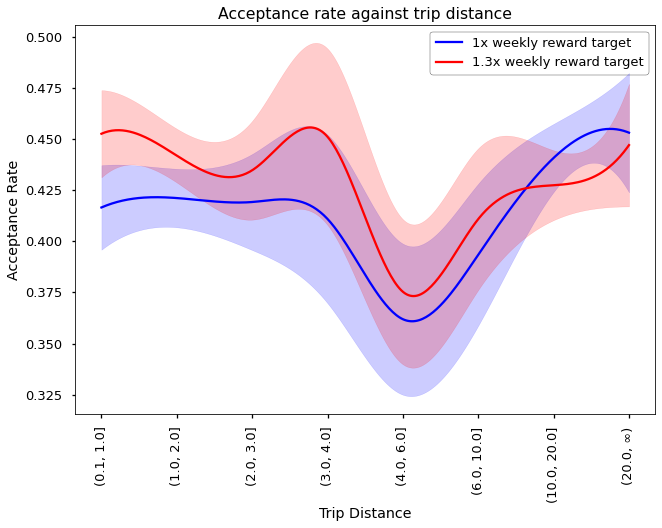

In [471]:
generate_graph_distance(distance_percent,np.arange(len(distance_percent)),distance_mean,distance_mean+distance_ci,distance_mean-distance_ci,distance_mean2, distance_mean2+distance_ci2,distance_mean2-distance_ci2 )

In [451]:
distance_mean3 = distance_mean + np.random.normal(0.023, .03, distance_mean.shape)
distance_ci3 = distance_ci + np.random.normal(0.005, .001, distance_ci.shape)

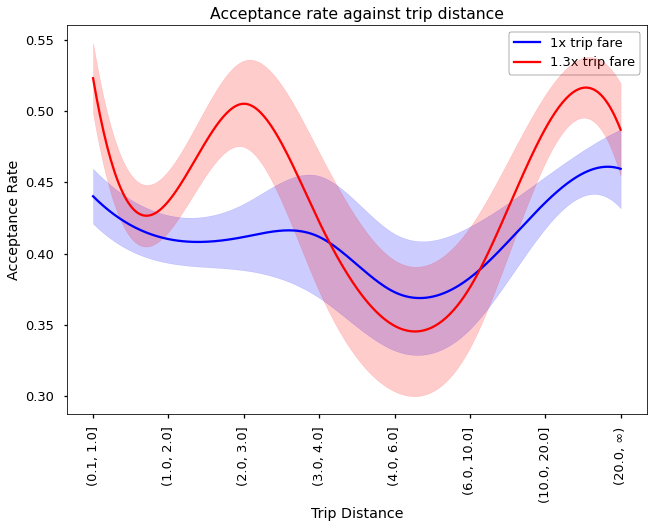

In [452]:
generate_graph_distance(distance_percent,np.arange(len(distance_percent)),distance_mean,distance_mean+distance_ci,distance_mean-distance_ci,distance_mean3, distance_mean3+distance_ci3,distance_mean3-distance_ci3 )